Order: 3
Coordinate Pairs:
[[-22.  16.]
 [ -3. -14.]
 [  4.   5.]
 [  6.   9.]
 [ 12.  22.]
 [ 44.  -6.]]


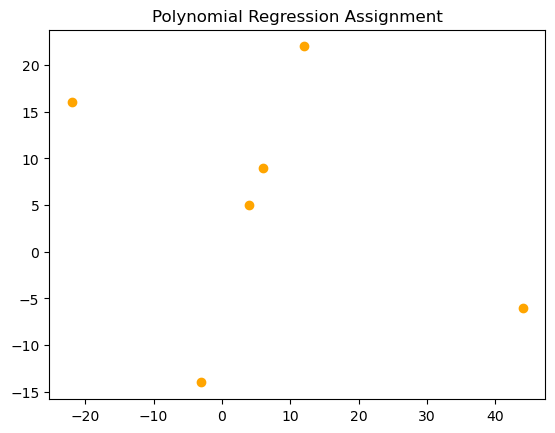

In [25]:
import fastmatrix as fm
import numpy as np
import matplotlib.pyplot as plt

filename = "input.txt"

with open("input.txt", "r") as file:
    lines = file.readlines()
    order = int(lines[0])  # Reads the first line for the order of the polynomial fit
    print("Order: " + str(order))
    data = np.array([list(map(float, line.strip().split())) for line in lines[1:]])
    print("Coordinate Pairs:\n" + str(data))

x_val = data[:,0]
y_val = data[:,1]

matrix_a = fm.Matrix(data)  # Needs implementation for matrix creation from previous assignment

matrix_a_transpose = matrix_a.transpose()

plt.scatter(x_val, y_val, color = "orange")

plt.title("Polynomial Regression Assignment")
plt.show()


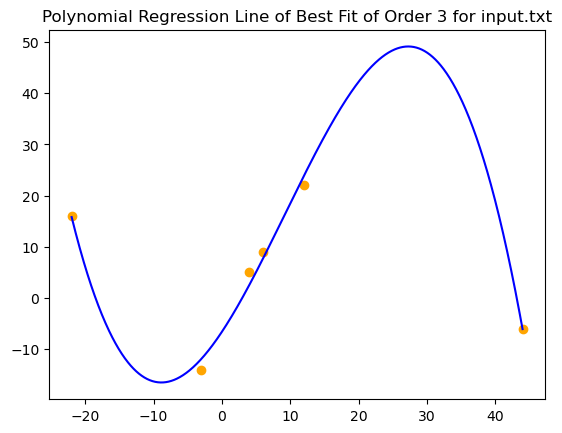

In [22]:
import numpy as np

def cNSolve(pts, order):
    "generates a list of values c0 through cn corrosponding to a polynomial fitting the data of the requested order n using fastmatrix"
    xVals = [p[0] for p in pts]
    yVals = [p[1] for p in pts]
    ones = [1] * len(pts)
    #the xMatrix is a matrix with n+1 columns and n rows where the first column is all ones, the second column is the x values, the third column is the x values squared, etc.
    xMatrix = fm.Matrix(np.vstack((ones, *[np.array(xVals) ** i for i in range(1, order+1)])))
    #the yMatrix is a matrix with one column and n rows where the rows are the y values
    yMatrix = fm.Matrix([np.array(yVals)])
    solution = (xMatrix * xMatrix.transpose()).inverse() * xMatrix * yMatrix.transpose()
    #the solution is a matrix with one column and n+1 rows, so we need to get the first row of the transpose
    return solution.transpose().__getitem__(0)

regressionFunc = cNSolve(data, order)

def generateYVals(xVals, cVals):
    "generates a list of y values corrosponding to a polynomial with coefficients cVals"
    return [sum([cVals[i] * x ** i for i in range(len(cVals))]) for x in xVals]

def generatePlot(xVals, yVals, cVals, title):
    "generates a plot of the data and the polynomial with coefficients cVals"
    plt.scatter(xVals, yVals, color = "orange")
    x_polyfit = np.linspace(np.min(xVals),np.max(xVals), 1000)
    y_polyfit = generateYVals(x_polyfit, cVals)
    plt.plot(x_polyfit, y_polyfit, color = "blue")
    plt.title(title)
    plt.show()

generatePlot(x_val, y_val, regressionFunc, "Polynomial Regression Line of Best Fit of Order " + str(order) + " for " + filename)